In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Gathering

I will be using the dataset "immo_data" uploaded to Kaggle by CorrieBar. I will concentrate in the NRW state and pay special attention to its capital Düsseldorf

In [2]:
# Import the dataset for all rental offers in Germany

df_germany = pd.read_csv('immo_data.csv')

In [3]:
# get the first look of the dataframe

df_germany.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


## Data Assessment

In [4]:
# search for duplicates
df_germany.duplicated().sum()

0

Nonetheless, it is possible that people publish the same object many times and thus get a different `scoutID`. In the same manner it is also possible that we have fake entries. Take a look if there are duplicated in a dataset without the `scoutID`

In [5]:
# get a list of all columns without scoutId

list_vars = list(df_germany.columns)

no_scoutID = [i for i in list_vars if i != 'scoutId']

In [6]:
df_germany[no_scoutID].duplicated().sum()

891

There are 891 duplicates if we ignore the scoutId var

In [7]:
# get some information about the variables

df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [8]:
df_germany.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


Some of the variables that might be of interest have big outliers that could affect the further assessmet. Since the dataset is big enough I will remove this outliers while keepeng 99.8% of the data

In [9]:
# first let us identify all nummerical variables:
list_num_vars = df_germany.select_dtypes(include=['float', 'int']).columns
list_num_vars

Index(['serviceCharge', 'telekomHybridUploadSpeed', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'yearConstructedRange', 'baseRent', 'livingSpace', 'noRooms',
       'thermalChar', 'floor', 'numberOfFloors', 'heatingCosts',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice'],
      dtype='object')

In [10]:
# get the statistics of the numerical variables
df_germany[list_num_vars].describe()

,serviceCharge,telekomHybridUploadSpeed,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,yearConstructedRange,baseRent,livingSpace,noRooms,thermalChar,floor,numberOfFloors,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,267018.000000,235492.000000,2.283330e+05,211805.000000,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,3.389001,28.804928,9.013315e+02,1966.400590,1.327634,3.714544,6.941294e+02,74.355548,2.641261,114.749533,2.122405,3.572319,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,1.964874,16.337151,3.323833e+04,46.992207,8.361403,2.738134,1.953602e+04,254.759208,2.633440,61.653663,3.634934,6.375496,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,-12.330000,1.000000,0.000000e+00,1000.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.100000,-1.000000,0.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,2.000000,10.000000,4.698000e+02,1950.000000,1.000000,1.000000,3.380000e+02,54.000000,2.000000,79.000000,1.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,3.390000,40.000000,6.500000e+02,1973.000000,1.000000,3.000000,4.900000e+02,67.320000,3.000000,107.000000,2.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,4.570000,40.000000,9.850000e+02,1996.000000,1.000000,5.000000,7.990000e+02,87.000000,3.000000,140.300000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,14.920000,100.000000,1.575154e+07,2090.000000,2241.000000,9.000000,9.999999e+06,111111.000000,999.990000,1996.000000,999.000000,999.000000,12613.000000,2919.000000,90.760000,0.227600


In [11]:
# find out the relative difference between the 99.8 percentile and the max value as a first
# indication of which variables have outliers

rel_diff_outl = []
for i in list_num_vars:
    percentile = np.nanpercentile(df_germany[i], 99.8) # get the 99.8 percentile
    max_var = df_germany[i].max() # get the max value of the variable
    rel_diff = max_var / percentile # get the relative difference between both values
    rel_diff_outl.append(rel_diff) # append the value to the list

# create a dataframe with the results combined
dict_1 = dict(variable = list(list_num_vars))
dict_2 = dict(relative_diff = rel_diff_outl)
dict_1.update(dict_2)

rel_diff_df = pd.DataFrame(data=dict_1)

# show dataframe
rel_diff_df.sort_values('relative_diff', ascending=False)

,variable,relative_diff
4,totalRent,3518.575149
8,baseRent,2499.999750
9,livingSpace,450.478611
0,serviceCharge,224.796923
10,noRooms,142.855714
12,floor,76.846154
6,noParkSpaces,72.528966
13,numberOfFloors,55.500000
14,heatingCosts,42.043333
11,thermalChar,5.104859


There are definetly some red flags, that we need to explore in detail:
* `toalRent`
* `baseRent`
* `livingSpace`
* `serviceCharge`
* `noRooms`
* `floor`
* `noParkSpaces`
* `heatingCosts`
* `thermalChar`

for now we will change only the two first variables of the list, since thesea our variables of interest

In [12]:
# Before making any change to the data set we will make a clone

df_copy = df_germany.copy()

In [13]:
test = pd.DataFrame(data = {'a': [1,2,3,4,5,np.nan,np.nan],
                           'b': [np.nan,2,3,4,np.nan,6,7]})

In [14]:
test

,a,b
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0
4,5.0,NaN
5,NaN,6.0
6,NaN,7.0


In [15]:
test2 = test.loc[(test.a >= 3) ^ (test.a.isnull())]
test2

,a,b
2,3.0,3.0
3,4.0,4.0
4,5.0,NaN
5,NaN,6.0
6,NaN,7.0


In [16]:
# as described before, keep only 99.8% of the data and get rid of the outliers

def get_rid_outl(df, list_num_var, percentile):
    """
    INPUT: 
    df: Dataframe
    list_num_var: List of the variables (columns) with outliers that need to be deleted
    percentile: float between 0 and 100: Percentage of the data that will be kept 
    
    OUTPUT:
    DataFrame with the defined amount of data. This means a DataFrame without outliers
    """
    
    perc_dict = {}
    for col in list_num_var: # first, calculate all the percentiles before removing any
        # row, otherwise you will remove more rows than necessary
        value_perc = np.nanpercentile(df[col], percentile)
        value_perc_dict = {col: value_perc}
        perc_dict.update(value_perc_dict)
        
    for var in list_num_var:    
        df = df.loc[(df[var] <= perc_dict[var]) ^ (df[var].isnull())] # include nan values
    
    return df

In [17]:
# for comparison
df_copy.shape

(268850, 49)

In [18]:
# create a dataframe without outliers for the main variables
df_sub = get_rid_outl(df_copy, ['totalRent', 'baseRent', 'heatingCosts'], 99.8)

In [19]:
# check how many rows were removed
df_sub.shape

(268129, 49)

C:\Users\Juan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Juan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


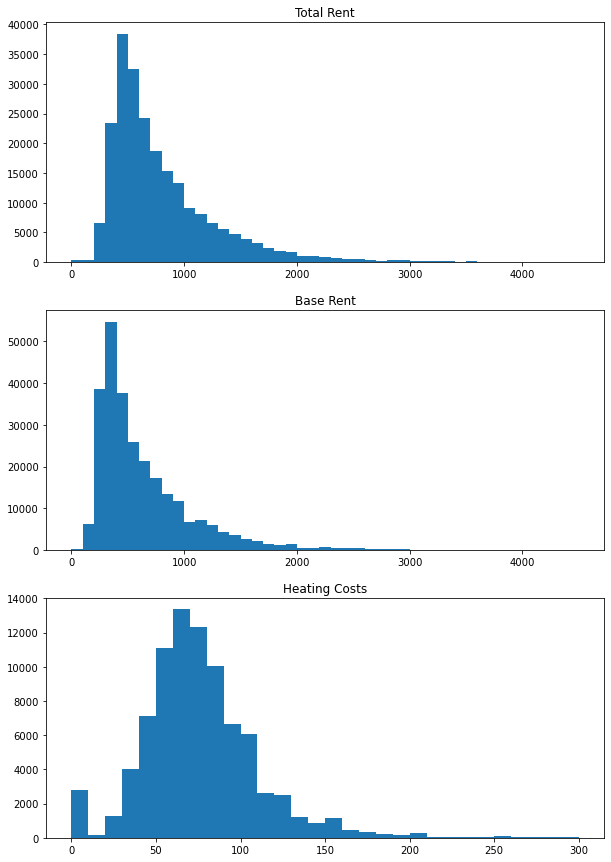

In [20]:
# get a better understanding of the variables
plt.figure(figsize=[10,15])

bin_edges = np.arange(0, df_sub.totalRent.max()+100, 100)

plt.subplot(3,1,1)
plt.hist(data=df_sub, x='totalRent', bins=bin_edges)
plt.title('Total Rent')

plt.subplot(3,1,2)
plt.hist(data=df_sub, x='baseRent', bins=bin_edges)
plt.title('Base Rent')

plt.subplot(3,1,3)
plt.hist(data=df_sub, x='heatingCosts', bins=30)
plt.title('Heating Costs');


For the two first variables we see a right skewed histogram - as expected. However we see an abnormal amount of total rents being equal to zero. We will have to investigate this further. The heating costs look normally distributed. 

Now I would like to understand the categorical variables

In [158]:
# get a datafram only with the categorical variables
df_cat_var = df_copy.select_dtypes(include=['object']).copy()

In [163]:
# Get the unique values of each variable 
for col in df_cat_var.columns:
    print('{}\n'.format(col))
    print('{}\n'.format(df_cat_var[col].value_counts()))

regio1

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

heatingType

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating             

C                 14613
NO_INFORMATION    14130
D                 13925
B                 11333
E                  7987
A                  4988
F                  4484
A_PLUS             3618
G                  1806
H                   903
Name: energyEfficiencyClass, dtype: int64

date

Feb20    79276
May19    76047
Oct19    66685
Sep18    46842
Name: date, dtype: int64



In [112]:
df_sub.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

### Summary Assessment

* around 900 duplicates when ignoring scoutId
* Meaning of "Range" column unknown
* Meaning of `firingType` unknown
* Meaning of `priceTrend` unknown
* Meaning of `facilities` unknown
* Column `houseNumber` not necessary
* Columns `street` and `streetPlain` not necessary
* Telekom columns are not necessary
* Identified variables with outliers need to be corrected
* Main variable price/rent unclear
* Abnormal amount of "zeros" in the `totalRent` variable
* NaN values in the numerical variables
* `yearConstructed` has to be before 2020
* Column `regio1` and `geo_bln` are the same
* Columns `geo_krs` and `regio2` seem to be the same
* Column `regio3` need further analyse - possible regions in the cities


## Cleaning the data

In [166]:
# create a copy of the data

df_clean = df_germany.copy()

**1)** Get rid of all duplicates while ignoring the scoutId variable 

In [190]:
# get rid of all duplicates (if we ignore scoutId)
df_clean = df_clean[no_scoutID].drop_duplicates()

In [191]:
# Test
df_clean[no_scoutID].duplicated().sum()

0

**2)** Get rid of all unwanted columns

In [192]:
# create a list of all the columns to be dropped
unwanted_col = ['telekomTvOffer', 
                'telekomHybridUploadSpeed', 
                'picturecount', 
                'telekomUploadSpeed', 
                'firingTypes', 
                'yearConstructedRange', 
                'houseNumber', 
                'street', 
                'streetPlain', 
                'baseRentRange', 
                'thermalChar',
                'noRoomsRange', 
                'livingSpaceRange', 
                'description', 
                'facilities',]

In [193]:
# get rid of all the unwanted columns
df_clean.drop(columns=unwanted_col, inplace=True)

In [194]:
# test
df_clean.shape

(267959, 33)

**3)** Get rid of outliers in important variables

In [198]:
# create a list of all variables with outliers
var_with_outl = ['totalRent',
                 'baseRent',
                 'livingSpace',
                 'serviceCharge',
                 'noRooms',
                 'floor',
                 'noParkSpaces',
                 'numberOfFloors',
                 'heatingCosts',
                 'pricetrend']

In [199]:
# use the function get_rid_outl() to get rid of the outliers without missing the NaNs

df_clean = get_rid_outl(df_clean, var_with_outl, 99.8)

In [200]:
# Test 1
df_clean.shape

(263483, 33)

In [201]:
# Test 2
df_clean.describe()

,serviceCharge,pricetrend,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,geo_plz,noRooms,floor,numberOfFloors,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,263483.000000,261686.000000,263483.000000,207370.000000,263483.000000,263483.000000,263483.000000,263483.000000,263483.000000,263483.00000,263483.000000,263483.000000,78814.000000,45858.000000,45858.000000
mean,143.029086,3.365524,669.295794,1966.257665,0.371402,623.664585,72.247273,37250.496780,2.604631,1.66405,2.183511,23.184595,2013.883041,89.116077,0.199769
std,78.160089,1.950298,513.422859,46.908483,0.609831,416.923441,28.839523,27783.193915,0.937245,1.58561,2.107484,38.471761,11.049568,5.392140,0.009675
min,0.000000,-12.330000,0.000000,1000.000000,0.000000,0.000000,0.000000,852.000000,1.000000,-1.00000,0.000000,0.000000,1015.000000,71.430000,0.170500
25%,90.000000,1.970000,387.460000,1950.000000,0.000000,335.000000,54.000000,9127.000000,2.000000,0.00000,0.000000,0.000000,2012.000000,90.760000,0.191500
50%,130.000000,3.360000,570.000000,1972.000000,0.000000,487.970000,67.000000,38667.000000,3.000000,1.00000,2.000000,0.000000,2017.000000,90.760000,0.198500
75%,181.000000,4.550000,895.000000,1996.000000,1.000000,789.000000,86.000000,56579.000000,3.000000,3.00000,4.000000,50.000000,2019.000000,90.760000,0.205500
max,534.000000,14.920000,4110.000000,2090.000000,11.000000,3320.000000,225.000000,99998.000000,6.000000,12.00000,14.000000,200.000000,2919.000000,90.760000,0.227600


**4)** Get a better understanding of the response variables and eventually get rid of unwanted zeros

I suspect that total Rent is made up from the base Rent plus some further costs (this could be heating, service charge or other costs)

In [212]:
# take a look at the costs
df_clean[['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge']]

,totalRent,baseRent,heatingCosts,serviceCharge
0,840.0,595.0,0.00,245.00
1,0.0,800.0,0.00,134.00
2,1300.0,965.0,0.00,255.00
3,0.0,343.0,87.23,58.15
4,903.0,765.0,0.00,138.00
...,...,...,...,...
268845,910.0,820.0,0.00,90.00
268846,1150.0,930.0,0.00,220.00
268847,930.0,650.0,0.00,220.00
268848,1015.0,840.0,40.00,175.00


By looking at the data it becomes pretty clear that the total rent comes from base rent and the service charges. This means, all zero values in the total rent column can be calculated with the other two variables

In [230]:
# create a function that gives me the sume of base rent and extra charges if the total
# rent is zero
def calculate_rent(total_rent, basic_rent, extra_charges):
    if total_rent == 0:
        return basic_rent + extra_charges 
    else:
        return total_rent

In [231]:
# apply the function to each row
df_clean['total_rent_new'] = df_clean.apply(lambda x: calculate_rent(x['totalRent'], 
                                                               x['baseRent'],
                                                               x['serviceCharge']),
                                      axis = 1)

In [233]:
df_clean[['totalRent', 'baseRent', 'heatingCosts', 'serviceCharge', 'total_rent_new']]

,totalRent,baseRent,heatingCosts,serviceCharge,total_rent_new
0,840.0,595.0,0.00,245.00,840.00
1,0.0,800.0,0.00,134.00,934.00
2,1300.0,965.0,0.00,255.00,1300.00
3,0.0,343.0,87.23,58.15,401.15
4,903.0,765.0,0.00,138.00,903.00
...,...,...,...,...,...
268845,910.0,820.0,0.00,90.00,910.00
268846,1150.0,930.0,0.00,220.00,1150.00
268847,930.0,650.0,0.00,220.00,930.00
268848,1015.0,840.0,40.00,175.00,1015.00


Identify rows where the base rent is higher than the total rent, which by definition cannot be true

In [237]:
df_clean[df_clean['total_rent_new'] < df_clean['baseRent']][['baseRent', 'totalRent', 'serviceCharge']]

,baseRent,totalRent,serviceCharge
1317,1100.0,1040.0,60.0
1390,530.0,450.0,80.0
1701,1832.0,1509.0,0.0
2122,1749.0,1440.0,0.0
3171,800.0,400.0,0.0
...,...,...,...
257961,700.0,200.0,180.0
261708,99.0,97.0,15.0
263216,250.0,3.0,120.0
264291,1550.0,1450.0,300.0


Fortunatelly there are only 185 rows that meets the condition above. For this reason I will just drop this rows from the dataset. 

In [249]:
# get rid of all the rows where base Rent is higher than total rent
print(df_clean.shape[0])
df_clean = df_clean[df_clean['total_rent_new'] >= df_clean['baseRent']]

# test that it worked properly
print(df_clean.shape[0])

263483
263298


Great! Furthermore, we should not have any NaN value anymore

In [250]:
# How many NaN values are there
df_clean.totalRent.isnull().sum()

0

**5)** Impute the NaN values of the nummerical variables

In [258]:
# get a list of the nummerical values in the df_clean
list_num_vars = list(df_clean.select_dtypes(include=['float', 'int']).columns)

In [259]:
# how many NaNs are there
df_clean[list_num_vars].isnull().sum()

serviceCharge                0
totalRent                    0
yearConstructed          56044
noParkSpaces                 0
baseRent                     0
livingSpace                  0
noRooms                      0
floor                        0
numberOfFloors               0
heatingCosts                 0
lastRefurbish           184551
electricityBasePrice    217464
electricityKwhPrice     217464
total_rent_new               0
dtype: int64

In [261]:
df_clean.lastRefurbish.value_counts()

2019.0    19660
2018.0    12804
2017.0     6935
2016.0     5543
2015.0     4519
          ...  
1914.0        1
1918.0        1
1920.0        1
1965.0        1
1015.0        1
Name: lastRefurbish, Length: 88, dtype: int64

I do not expect the electricity price to play a role in the rent, as in germany the price for electricity is pretty homogeneous. I will drop both columns.
The year of construction and the last refurbish are both categorical variables. This means we have to change the data type.
No need to manage NaN values for the nummeric variables, as there are no NaN values

In [ ]:
# change the data type of the variables to datetime and change all wierd values